In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [25]:
df = pd.read_csv('/Users/esrefyigitbas/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [27]:
df.shape

(1470, 35)

In [30]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [3]:
conn = sqlite3.connect('hr_analytics.db')

In [4]:
df.to_sql('employees', conn, if_exists='replace', index=False)

1470

In [6]:
query = """
SELECT Department, COUNT(*) AS employee_count
FROM employees
GROUP BY Department;
"""

In [11]:
#DEPARTMAN BAZLI ÇALIŞAN SAYISI
database_query = pd.read_sql_query(query, conn)
print(database_query)

               Department  employee_count
0         Human Resources              63
1  Research & Development             961
2                   Sales             446


In [12]:
query2 = """
SELECT Department,
       SUM(CASE WHEN Attrition='Yes' THEN 1 ELSE 0 END) AS resigned,
       COUNT(*) AS total,
       ROUND(SUM(CASE WHEN Attrition='Yes' THEN 1 ELSE 0 END)*100.0/COUNT(*),2) AS attrition_rate
FROM employees
GROUP BY Department;
"""

In [13]:
#İşten ayrılma oranı (Attrition)
database_query2 = pd.read_sql_query(query2,conn)
print(database_query2)

               Department  resigned  total  attrition_rate
0         Human Resources        12     63           19.05
1  Research & Development       133    961           13.84
2                   Sales        92    446           20.63


In [14]:
query3 ="""
SELECT JobRole, AVG(MonthlyIncome) AS avg_salary
FROM employees
GROUP BY JobRole
ORDER BY avg_salary DESC;
"""

In [16]:
#Pozisyon bazlı ortalama maaş
database_query3 = pd.read_sql_query(query3,conn)
print(database_query3)

                     JobRole    avg_salary
0                    Manager  17181.676471
1          Research Director  16033.550000
2  Healthcare Representative   7528.763359
3     Manufacturing Director   7295.137931
4            Sales Executive   6924.279141
5            Human Resources   4235.750000
6         Research Scientist   3239.972603
7      Laboratory Technician   3237.169884
8       Sales Representative   2626.000000


In [18]:
# Departman bazlı işten ayrılma oranı
query4 = """
SELECT Department,
       SUM(CASE WHEN Attrition='Yes' THEN 1 ELSE 0 END)*100.0/COUNT(*) AS attrition_rate
FROM employees
GROUP BY Department;
"""

In [19]:
attrition_df = pd.read_sql_query(query, conn)

/var/folders/f3/_hyvf4jx3n7c142q6ywwcvwc0000gn/T/ipykernel_48401/491259382.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=attrition_df, x='Department', y='attrition_rate', palette='viridis')


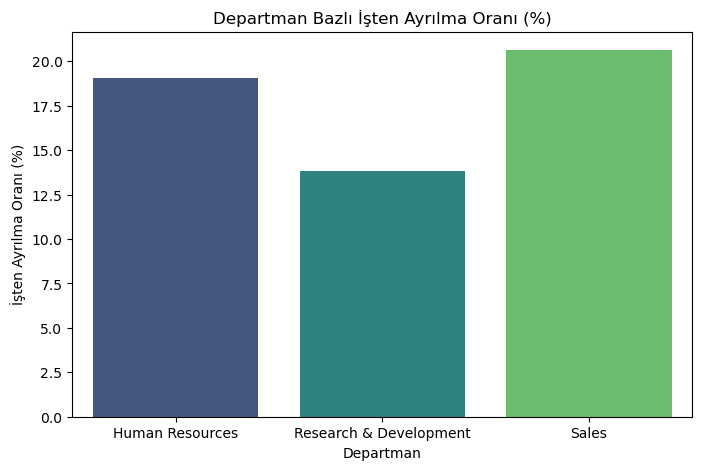

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(data=attrition_df, x='Department', y='attrition_rate', palette='viridis')
plt.title('Departman Bazlı İşten Ayrılma Oranı (%)')
plt.ylabel('İşten Ayrılma Oranı (%)')
plt.xlabel('Departman')
plt.show()

In [21]:
# Pozisyon bazlı ortalama maaş
salary_query = "SELECT JobRole, AVG(MonthlyIncome) AS avg_salary FROM employees GROUP BY JobRole ORDER BY avg_salary DESC"
salary_df = pd.read_sql_query(salary_query, conn)


/var/folders/f3/_hyvf4jx3n7c142q6ywwcvwc0000gn/T/ipykernel_48401/4146204289.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=salary_df, x='JobRole', y='avg_salary', palette='coolwarm')


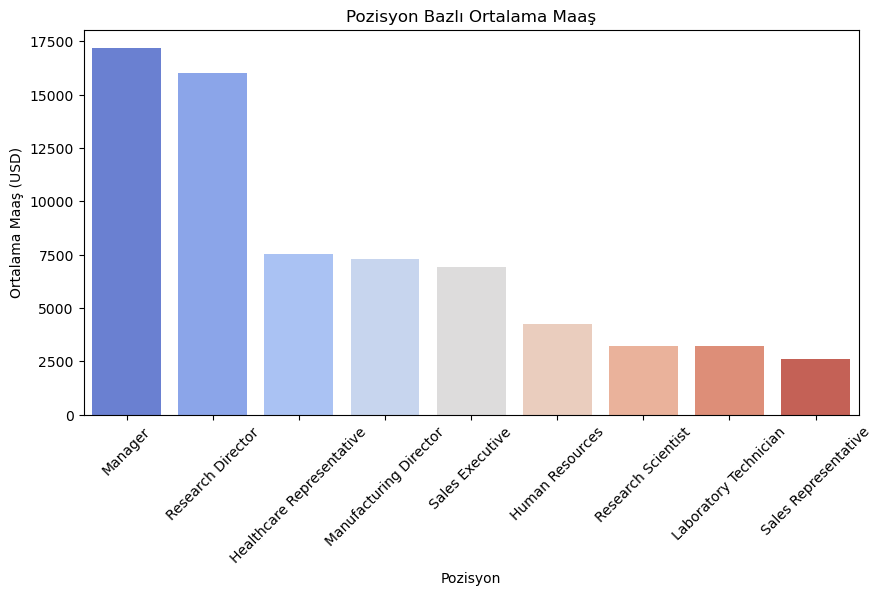

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(data=salary_df, x='JobRole', y='avg_salary', palette='coolwarm')
plt.title('Pozisyon Bazlı Ortalama Maaş')
plt.xticks(rotation=45)
plt.ylabel('Ortalama Maaş (USD)')
plt.xlabel('Pozisyon')
plt.show()

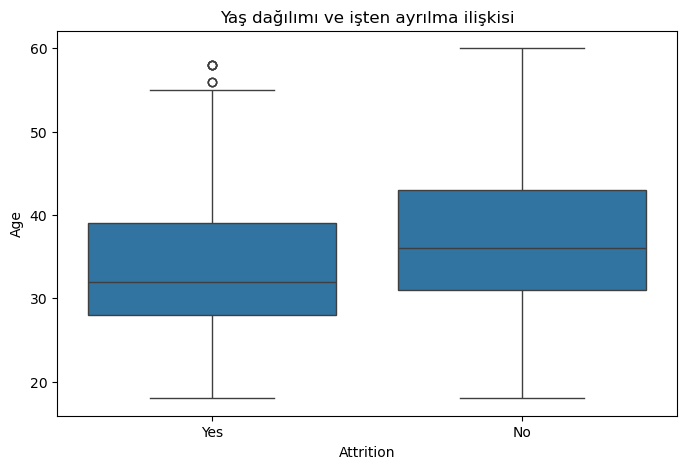

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Attrition", y="Age", data=df)
plt.title("Yaş dağılımı ve işten ayrılma ilişkisi")
plt.show()

** Ayrılanların yaşlarının daha çok 20–30 arasında yoğunlaştığını görülüyor

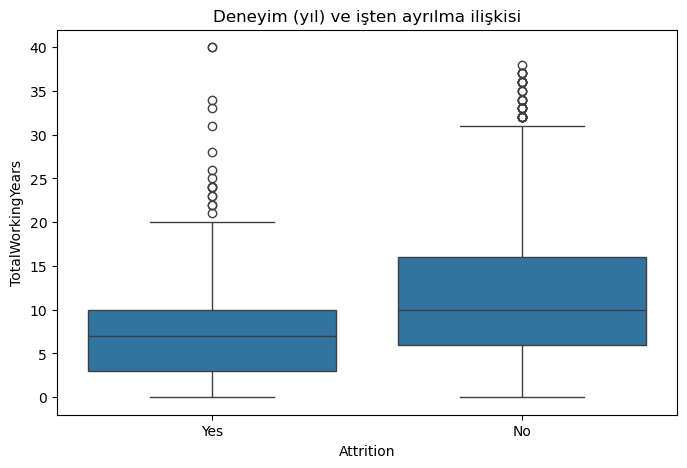

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Attrition", y="TotalWorkingYears", data=df)
plt.title("Deneyim (yıl) ve işten ayrılma ilişkisi")
plt.show()

** Deneyimi az olanların ayrılma olaslığı yüksek